# The purpose is to show the jacobi

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic',\
               'k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[3])

In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [13]:
fits_files

['jc_1.fits',
 'jc_10.fits',
 'jc_100.fits',
 'jc_101.fits',
 'jc_102.fits',
 'jc_103.fits',
 'jc_104.fits',
 'jc_105.fits',
 'jc_106.fits',
 'jc_107.fits',
 'jc_108.fits',
 'jc_109.fits',
 'jc_11.fits',
 'jc_110.fits',
 'jc_111.fits',
 'jc_112.fits',
 'jc_113.fits',
 'jc_114.fits',
 'jc_115.fits',
 'jc_116.fits',
 'jc_117.fits',
 'jc_118.fits',
 'jc_119.fits',
 'jc_12.fits',
 'jc_120.fits',
 'jc_121.fits',
 'jc_122.fits',
 'jc_123.fits',
 'jc_124.fits',
 'jc_125.fits',
 'jc_126.fits',
 'jc_127.fits',
 'jc_128.fits',
 'jc_129.fits',
 'jc_13.fits',
 'jc_130.fits',
 'jc_131.fits',
 'jc_132.fits',
 'jc_133.fits',
 'jc_134.fits',
 'jc_135.fits',
 'jc_136.fits',
 'jc_137.fits',
 'jc_138.fits',
 'jc_139.fits',
 'jc_14.fits',
 'jc_140.fits',
 'jc_141.fits',
 'jc_142.fits',
 'jc_143.fits',
 'jc_144.fits',
 'jc_145.fits',
 'jc_146.fits',
 'jc_147.fits',
 'jc_148.fits',
 'jc_149.fits',
 'jc_15.fits',
 'jc_150.fits',
 'jc_151.fits',
 'jc_152.fits',
 'jc_153.fits',
 'jc_154.fits',
 'jc_155.fits',


In [14]:
fits_files.remove('jspectype.fits')

## Find the star-names in the files

In [15]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [16]:
#obj_names = []
#index=0
#for hdr in obj_headers: 
#        obj_name=obj_headers[index]['TARGETID']
#        obj_names.append(obj_name)
#        index+=1

In [17]:
filelist[:5]

['jc_1.fits', 'jc_10.fits', 'jc_100.fits', 'jc_101.fits', 'jc_102.fits']

In [18]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('^jc_([0-9].*).fits$',thefile) 
    if(len(thenames)>0):
        obj_names2.append('jc_'+thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [19]:
print obj_names2

['jc_1', 'jc_10', 'jc_100', 'jc_101', 'jc_102', 'jc_103', 'jc_104', 'jc_105', 'jc_106', 'jc_107', 'jc_108', 'jc_109', 'jc_11', 'jc_110', 'jc_111', 'jc_112', 'jc_113', 'jc_114', 'jc_115', 'jc_116', 'jc_117', 'jc_118', 'jc_119', 'jc_12', 'jc_120', 'jc_121', 'jc_122', 'jc_123', 'jc_124', 'jc_125', 'jc_126', 'jc_127', 'jc_128', 'jc_129', 'jc_13', 'jc_130', 'jc_131', 'jc_132', 'jc_133', 'jc_134', 'jc_135', 'jc_136', 'jc_137', 'jc_138', 'jc_139', 'jc_14', 'jc_140', 'jc_141', 'jc_142', 'jc_143', 'jc_144', 'jc_145', 'jc_146', 'jc_147', 'jc_148', 'jc_149', 'jc_15', 'jc_150', 'jc_151', 'jc_152', 'jc_153', 'jc_154', 'jc_155', 'jc_156', 'jc_157', 'jc_158', 'jc_159', 'jc_16', 'jc_160', 'jc_161', 'jc_17', 'jc_18', 'jc_19', 'jc_2', 'jc_20', 'jc_21', 'jc_22', 'jc_23', 'jc_24', 'jc_25', 'jc_26', 'jc_27', 'jc_28', 'jc_29', 'jc_3', 'jc_30', 'jc_31', 'jc_32', 'jc_33', 'jc_34', 'jc_35', 'jc_36', 'jc_37', 'jc_38', 'jc_39', 'jc_4', 'jc_40', 'jc_41', 'jc_42', 'jc_43', 'jc_44', 'jc_45', 'jc_46', 'jc_47', 'jc_4

In [20]:
obj_names=obj_names2

In [21]:
print obj_files

['jc_1.fits', 'jc_10.fits', 'jc_100.fits', 'jc_101.fits', 'jc_102.fits', 'jc_103.fits', 'jc_104.fits', 'jc_105.fits', 'jc_106.fits', 'jc_107.fits', 'jc_108.fits', 'jc_109.fits', 'jc_11.fits', 'jc_110.fits', 'jc_111.fits', 'jc_112.fits', 'jc_113.fits', 'jc_114.fits', 'jc_115.fits', 'jc_116.fits', 'jc_117.fits', 'jc_118.fits', 'jc_119.fits', 'jc_12.fits', 'jc_120.fits', 'jc_121.fits', 'jc_122.fits', 'jc_123.fits', 'jc_124.fits', 'jc_125.fits', 'jc_126.fits', 'jc_127.fits', 'jc_128.fits', 'jc_129.fits', 'jc_13.fits', 'jc_130.fits', 'jc_131.fits', 'jc_132.fits', 'jc_133.fits', 'jc_134.fits', 'jc_135.fits', 'jc_136.fits', 'jc_137.fits', 'jc_138.fits', 'jc_139.fits', 'jc_14.fits', 'jc_140.fits', 'jc_141.fits', 'jc_142.fits', 'jc_143.fits', 'jc_144.fits', 'jc_145.fits', 'jc_146.fits', 'jc_147.fits', 'jc_148.fits', 'jc_149.fits', 'jc_15.fits', 'jc_150.fits', 'jc_151.fits', 'jc_152.fits', 'jc_153.fits', 'jc_154.fits', 'jc_155.fits', 'jc_156.fits', 'jc_157.fits', 'jc_158.fits', 'jc_159.fits', 'j

In [22]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [23]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

jc_1 : 
jc_1.fits
jc_10 : 
jc_10.fits
jc_100 : 
jc_100.fits
jc_101 : 
jc_101.fits
jc_102 : 
jc_102.fits
jc_103 : 
jc_103.fits
jc_104 : 
jc_104.fits
jc_105 : 
jc_105.fits
jc_106 : 
jc_106.fits
jc_107 : 
jc_107.fits
jc_108 : 
jc_108.fits
jc_109 : 
jc_109.fits
jc_11 : 
jc_11.fits
jc_110 : 
jc_110.fits
jc_111 : 
jc_111.fits
jc_112 : 
jc_112.fits
jc_113 : 
jc_113.fits
jc_114 : 
jc_114.fits
jc_115 : 
jc_115.fits
jc_116 : 
jc_116.fits
jc_117 : 
jc_117.fits
jc_118 : 
jc_118.fits
jc_119 : 
jc_119.fits
jc_12 : 
jc_12.fits
jc_120 : 
jc_120.fits
jc_121 : 
jc_121.fits
jc_122 : 
jc_122.fits
jc_123 : 
jc_123.fits
jc_124 : 
jc_124.fits
jc_125 : 
jc_125.fits
jc_126 : 
jc_126.fits
jc_127 : 
jc_127.fits
jc_128 : 
jc_128.fits
jc_129 : 
jc_129.fits
jc_13 : 
jc_13.fits
jc_130 : 
jc_130.fits
jc_131 : 
jc_131.fits
jc_132 : 
jc_132.fits
jc_133 : 
jc_133.fits
jc_134 : 
jc_134.fits
jc_135 : 
jc_135.fits
jc_136 : 
jc_136.fits
jc_137 : 
jc_137.fits
jc_138 : 
jc_138.fits
jc_139 : 
jc_139.fits
jc_14 : 
jc_14.fits
jc

## Plot the SED

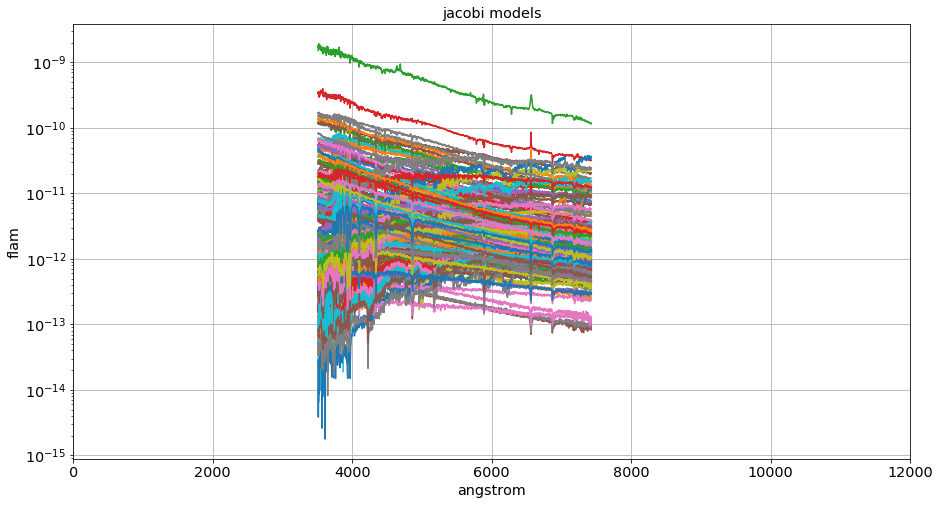

In [24]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    #plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("jacobi models")
    plt.savefig("jacobi.png")